# clustering

This is called clustering: it is the task of identifying similar instances
and assigning them to clusters, i.e., groups of similar instances.

at two popular clustering algorithms: K-Means and
DBSCAN,

# K-Means


In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=5)
y_pred = k.fit_predict(X)

In [43]:
k.n_clusters

5

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4,
       4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 4, 4, 4,
       3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 1, 4, 2, 1, 1, 2, 3, 2, 1, 2,
       1, 1, 1, 4, 1, 1, 1, 2, 2, 4, 1, 4, 2, 4, 1, 2, 4, 4, 1, 2, 2, 2,
       1, 4, 4, 2, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4])

The KMeans instance preserves a
copy of the labels of the instances it was trained on, available via the labels_ instance
variable:


In [33]:
k.labels_==y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [39]:
#We can also take a look at the 5 centroids that the algorithm found:
k.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256]])

In [47]:
#you can easily assign new instances to the cluster whose centroid is closest:
import numpy as np
X_new = np.array([[5.5, 3.5, 1.3, 0.2],[4.7, 3.6, 1.1, 0.2],[4.2, 3. , 1.4, 0.1]])
k.predict(X_new)

array([0, 0, 0])

In [18]:
import pandas as pd
df = pd.DataFrame(X, columns = data.feature_names)
df['cluster'] = y_pred
df['species']  = y
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,2
146,6.3,2.5,5.0,1.9,4,2
147,6.5,3.0,5.2,2.0,1,2
148,6.2,3.4,5.4,2.3,1,2


In [30]:
df[df['cluster']==0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


In [24]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [53]:
#other kmean example

In [4]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

NameError: name 'np' is not defined

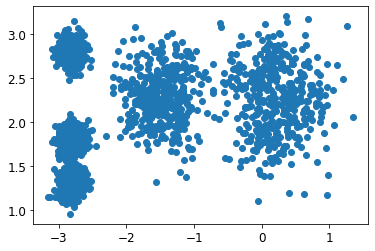

In [60]:
plt.scatter(X[:,0], X[:,1])
plt.show()

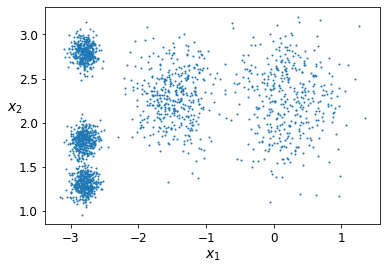

In [62]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plot_clusters(X, y=None)

In [88]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=5)
y_pred = k.fit_predict(X)
y_pred

array([4, 1, 2, ..., 3, 2, 1])

In [89]:
k.labels_

array([4, 1, 2, ..., 3, 2, 1])

In [90]:
y_pred in k.labels_

True

In [91]:
k.n_clusters

5

In [92]:
#centroides
k.cluster_centers_   #1.[cx1, cx2], 2.[]..so on up to 4.[] centroid coordinates

array([[-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [93]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
k.predict(X_new)

array([2, 2, 3, 3])

hard clustering and soft clustering

1. Instead of assigning each instance to a single cluster, which is called hard clustering, 
2. it
can be useful to just give each instance a score per cluster: this is called soft clustering
3.  score can be the distance between the instance and the centroid, or
conversely it can be a similarity score (or affinity) such as the Gaussian Radial Basis
Function

In the KMeans class, the transform() method
measures the distance from each instance to every centroid

In [96]:
k.transform(X_new)

array([[1.49439034, 2.81093633, 0.32995317, 2.9042344 , 2.88633901],
       [4.4759332 , 5.80730058, 2.80290755, 5.84739223, 5.84236351],
       [1.69136631, 1.21475352, 3.29399768, 0.29040966, 1.71086031],
       [1.54808703, 0.72581411, 3.21806371, 0.36159148, 1.21567622]])

In [97]:
X_new


array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

# kmean algo
1. Suppose you were
given the centroids: you could easily label all the instances in the dataset by assigning
each of them to the cluster whose centroid is closest. 
2. if you were given all
the instance labels, you could easily locate all the centroids by computing the mean of
the instances for each cluster. 
3. when nothing is given

1. just start by placing the centroids randomly (e.g., by
picking k instances at random and using their locations as centroids). 
2. Then label the
instances, update the centroids, label the instances, update the centroids, and so on
until the centroids stop moving. 
3. The algorithm is guaranteed to converge in a finite
number of steps (usually quite small), it will not oscillate forever2
.

# The K-Means Algorithm
The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:

1. First initialize 𝑘 centroids randomly: 𝑘 distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
2. Repeat until convergence (i.e., until the centroids stop moving):
    1. Assign each instance to the closest centroid.
    2. Update the centroids to be the mean of the instances that are assigned to them.

# centroid initialization.
1. although the algorithm is guaranteed to converge, it may not converge
to the right solution (i.e., it may converge to a local optimum): 
2. this depends on the
centroid initialization. 
3. you can mitigate this risk by improving the centroid initializa‐
tion

In [98]:
1. solution is to run the algorithm multiple times with different random initial‐
izations and keep the best solution.
2. This is controlled by the n_init hyperparameter:
by default, it is equal to 10, which means that the whole algorithm described earlier
actually runs 10 times when you call fit(), and Scikit-Learn keeps the best solution

211.59853725816828

# how exactly does it know which solution is the best? model’s inertia 
1. it uses a per‐
formance metric! It is called the model’s inertia: 
2. this is the mean squared distance
between each instance and its closest centroid.
3. The KMeans class runs the algorithm n_init times
and keeps the model with the lowest inertia:

Inertia
To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric:

In [99]:
k.inertia_

211.59853725816828

The score() method returns the negative inertia. Why negative? Well, it is because a
predictor’s score() method must always respect the "great is better" rule.

In [102]:
k.score(X)

-211.59853725816836

# e K-Means++ initialization algorithm:
Centroid initialization methods
Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a 2006 paper by David Arthur and Sergei Vassilvitskii:

1. Take one centroid 𝑐1, chosen uniformly at random from the dataset.
2. Take a new center 𝑐𝑖, choosing an instance 𝐱𝑖 with probability: 𝐷(𝐱𝑖)2 / ∑𝑗=1𝑚𝐷(𝐱𝑗)2 where 𝐷(𝐱𝑖) is the distance between the instance 𝐱𝑖 and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
3. Repeat the previous step until all 𝑘 centroids have been chosen.

The KMeans class actually uses this initialization method by default. If you want to
force it to use the original method (i.e., picking k instances randomly to define the
initial centroids), then you can set the init hyperparameter to "random". You will
rarely need to do this

# Accelerated K-Means
The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this 2003 paper by Charles Elkan for more details).

# Mini-Batch K-Means
 Instead of using the full dataset at each iteration, the algo‐
rithm is capable of using mini-batches, moving the centroids just slightly at each iter‐
ation. This speeds up the algorithm typically by a factor of 3 or 4 and makes it
possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements
this algorithm in the MiniBatchKMeans class.   

In [104]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)
minibatch_kmeans.inertia_

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


212.65280685133155

Although the Mini-batch K-Means algorithm is much faster than the regular KMeans algorithm, its inertia is generally slightly worse, especially as the number of
clusters increases.

# Finding the Optimal Number of Clusters

1. inertia is not a good performance metric when trying to choose k since it keeps get‐
ting lower as we increase k. 
2. Indeed, the more clusters there are, the closer each
instance will be to its closest centroid, and therefore the lower the inertia will be. Let’s
plot the inertia as a function of k 

This curve has roughly the
shape of an arm, and there is an “elbow” at k=4 so if we did not know better, it would
be a good choice: 

In [107]:
kmn = [KMeans(n_clusters = i, random_state=42).fit(X) for i in range(1,10)]
inertia = [j.inertia_ for j in kmn]



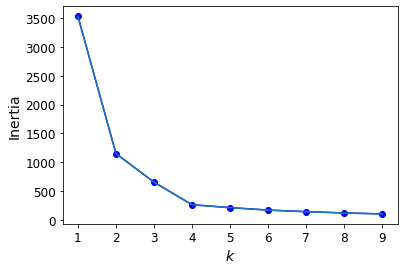

In [113]:
k =[m for m in range(1,10)]
plt.plot(range(1, 10), inertia, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(k,inertia)

This technique for choosing the best value for the number of clusters is rather coarse.

In [ ]:
kmn = [KMeans(n_clusters = i, random_state=42).fit(X) for i in range(1,10)]
inertia = [j.inertia_ for j in kmn]

from kneed import KneeLocator
#with the help of it we can get the value of k from graph
kn = KneeLocator(range(1, 10), inertia, curve='convex', direction='decreasing')
print(kn.knee)

# silhouette score,

1. A more precise approach (but also more computationally expensive) is to use the sil‐
houette score, 
2. which is the mean silhouette coefcient over all the instances.

3. An instan‐
ce’s silhouette coefficient is equal to (b – a) / max(a, b) 
4.where a is the mean distance
to the other instances in the same cluster (it is the mean intra-cluster distance), and 
5. b
is the mean nearest-cluster distance, that is the mean distance to the instances of the
next closest cluster (defined as the one that minimizes b, excluding the instance’s own
cluster). 
6. The silhouette coefficient can vary between -1 and +1: a coefficient close to
7. +1 means that the instance is well inside its own cluster and far from other clusters,
7. while a coefficient close to 0 means that it is close to a cluster boundary, 
8. a
coefficient close to -1 means that the instance may have been assigned to the wrong
cluster. 


To compute the silhouette score, you can use Scikit-Learn’s silhou
ette_score() function, giving it all the instances in the dataset, and the labels they
were assigned:


In [114]:
km = KMeans(n_clusters=5)
km.fit(X)

from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)


0.655517642572828

In [120]:
km.labels_

array([3, 2, 1, ..., 0, 1, 2])

In [122]:
kmn = [KMeans(n_clusters = i, random_state=42).fit(X) for i in range(1,10)]
silhouette_score = [silhouette_score(X, j.labels_) for j in kmn[1:]]

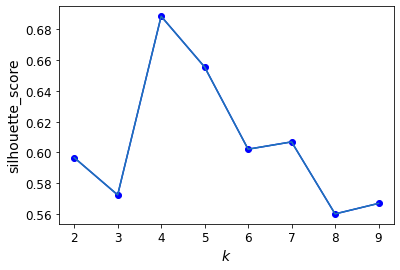

In [131]:
k =[m for m in range(2,10)]
plt.plot(range(2, 10), silhouette_score, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)

plt.plot(k,silhouette_score)

As you can see, this visualization is much richer than the previous one: in particular,
although it confirms that k=4 is a very good choice, it also underlines the fact that
k=5 is quite good as well, and much better than k=6 or 7. 

note


It is important to scale the input features before you run K-Means,
or else the clusters may be very stretched, and K-Means will per‐
form poorly. Scaling the features does not guarantee that all the
clusters will be nice and spherical, but it generally improves things

# Using clustering for image segmentation

Image segmentation is the task of partitioning an image into multiple segments. In
semantic segmentation, all pixels that are part of the same object type get assigned to
the same segment

 color segmentation. We will simply assign pixels to the
same segment if they have a similar color

First, let’s load the image  using Matplotlib’s
imread() function:

In [138]:
import urllib
# Download the ladybug image
images_path = os.path.join(r'C:\Users\USER\ML\REGRESSION\chapter4\New folder', "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('C:\\Users\\USER\\ML\\REGRESSION\\chapter4\\New folder\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x156fb618d90>)

In [140]:
import os
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [142]:
image.shape  #3D array

(533, 800, 3)

In [152]:
image

array([[[0.09803922, 0.11372549, 0.00784314],
        [0.09411765, 0.10980392, 0.00392157],
        [0.09411765, 0.11372549, 0.        ],
        ...,
        [0.22352941, 0.4117647 , 0.08235294],
        [0.21960784, 0.40392157, 0.08627451],
        [0.20392157, 0.3882353 , 0.07450981]],

       [[0.09411765, 0.10980392, 0.00392157],
        [0.09019608, 0.10588235, 0.        ],
        [0.09019608, 0.10588235, 0.        ],
        ...,
        [0.23529412, 0.42352942, 0.08627451],
        [0.23137255, 0.41568628, 0.09803922],
        [0.21568628, 0.4       , 0.08627451]],

       [[0.09019608, 0.10588235, 0.00784314],
        [0.08627451, 0.10196079, 0.00392157],
        [0.08627451, 0.10196079, 0.        ],
        ...,
        [0.25882354, 0.44705883, 0.10980392],
        [0.24705882, 0.43529412, 0.10588235],
        [0.22745098, 0.4117647 , 0.09411765]],

       ...,

       [[0.05490196, 0.07058824, 0.00392157],
        [0.05490196, 0.07058824, 0.00392157],
        [0.05098039, 0

1. The image is represented as a 3D array: 
2. the first dimension’s size is the height, the
3. second is the width, and 
4. the third is the number of color channels, in this case red,
green and blue (RGB)., each between 0.0 and 1.0 (or between 0 and 255
if you use imageio.imread()). 

5. The following code reshapes the array to get a
long list of RGB colors, then it clusters these colors using K-Means.

In [146]:
X = image.reshape(-1, 3)  #2D aray
X.shape

(426400, 3)

In [166]:
X = image.reshape(-1, 3)
km = KMeans(n_clusters=4).fit(X)

In [167]:
segmented_img = km.cluster_centers_[km.labels_]
segmented_img
segmented_img = segmented_img.reshape(image.shape)
segmented_img

array([[[0.04442988, 0.15423268, 0.0083786 ],
        [0.04442988, 0.15423268, 0.0083786 ],
        [0.04442988, 0.15423268, 0.0083786 ],
        ...,
        [0.20953664, 0.37669334, 0.05660102],
        [0.20953664, 0.37669334, 0.05660102],
        [0.20953664, 0.37669334, 0.05660102]],

       [[0.04442988, 0.15423268, 0.0083786 ],
        [0.04442988, 0.15423268, 0.0083786 ],
        [0.04442988, 0.15423268, 0.0083786 ],
        ...,
        [0.20953664, 0.37669334, 0.05660102],
        [0.20953664, 0.37669334, 0.05660102],
        [0.20953664, 0.37669334, 0.05660102]],

       [[0.04442988, 0.15423268, 0.0083786 ],
        [0.04442988, 0.15423268, 0.0083786 ],
        [0.04442988, 0.15423268, 0.0083786 ],
        ...,
        [0.20953664, 0.37669334, 0.05660102],
        [0.20953664, 0.37669334, 0.05660102],
        [0.20953664, 0.37669334, 0.05660102]],

       ...,

       [[0.04442988, 0.15423268, 0.0083786 ],
        [0.04442988, 0.15423268, 0.0083786 ],
        [0.04442988, 0

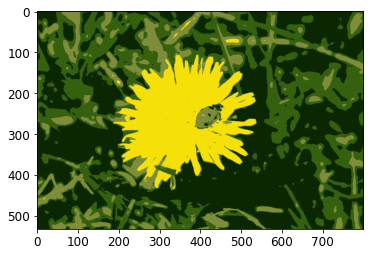

In [168]:
plt.imshow(segmented_img)

When you use less than 8
clusters, notice that the ladybug’s flashy red color fails to get a cluster of its owngets merged with colors from the environment. This is due to the fact that the lady‐
bug is quite small, much smaller than the rest of the image, so even though its color is
flashy, K-Means fails to dedicate a cluster to it: as mentioned earlier, K-Means prefers
clusters of similar sizes.


# Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a
preprocessing step before a supervised learning algorithm. 

For example, let’s tackle
the digits dataset which is a simple MNIST-like dataset containing 1,797 grayscale 8×8
images representing digits 0 to 9. First, let’s load the dataset:


In [169]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [171]:
#fit logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [172]:
log_reg.score(X_test, y_test)


0.9555555555555556

 Let’s see if we can do better by using KMeans as a preprocessing step

In [178]:
from sklearn.pipeline import Pipeline
pp = Pipeline([
    ('kmean', KMeans(n_clusters=50)),
    ('lg', LogisticRegression()),
])

pp.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmean', KMeans(n_clusters=50)), ('lg', LogisticRegression())])

In [180]:
pp.score(X_test, y_test)

0.9733333333333334

In [187]:
#how to choose the value of k in above as we choosen it randomly
#Let’s use GridSearchCV to find theoptimal number of clusters:

from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 20))
grid_clf = GridSearchCV(pp, param_grid, cv=2, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


ValueError: Invalid parameter kmeans for estimator Pipeline(steps=[('kmean', KMeans(n_clusters=50)), ('lg', LogisticRegression())]). Check the list of available parameters with `estimator.get_params().keys()`.

In [188]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [189]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9822222222222222

In [193]:
param_grid = dict(kmeans__n_clusters=range(89, 92))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ..............................kmeans__n_clusters=89; total time=  15.3s
[CV] END ..............................kmeans__n_clusters=89; total time=  22.6s
[CV] END ..............................kmeans__n_clusters=89; total time=  14.9s
[CV] END ..............................kmeans__n_clusters=90; total time=  17.1s
[CV] END ..............................kmeans__n_clusters=90; total time=  12.6s
[CV] END ..............................kmeans__n_clusters=90; total time=   9.5s
[CV] END ..............................kmeans__n_clusters=91; total time=  13.1s
[CV] END ..............................kmeans__n_clusters=91; total time=  12.7s
[CV] END ..............................kmeans__n_clusters=91; total time=  12.7s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(89, 92)}, verbose=2)

In [194]:
grid_clf.best_params_

{'kmeans__n_clusters': 91}

In [195]:
grid_clf.score(X_test, y_test)

0.9777777777777777

# Using Clustering for Semi-Supervised Learning


Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

In [197]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8577777777777778

It's much less than earlier of course. Let's see how we can do better. First, let's cluster the training set into 50 clusters, then for each cluster let's find the image closest to the centroid. We will call these images the representative images:

In [206]:
kmeans = KMeans(n_clusters=50, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [208]:
X_representative_digits

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ..., 10.,  1.,  0.],
       [ 0.,  4., 15., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  8.,  0.,  0.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.]])

In [209]:
X_train

array([[ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0.,  6., 13., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  3., ..., 12.,  0.,  0.]])

In [210]:
#not understood see it later

# DBSCAN
This approach allows the algorithm to identify clusters of
arbitrary shapes.
This algorithm defines clusters as continuous regions of high density

εneighborhood
For each instance, the algorithm counts how many instances are located within a
small distance ε (epsilon) from it. This region is called the instance’s εneighborhood.


core instance
• If an instance has at least min_samples instances in its ε-neighborhood (includ‐
ing itself), then it is considered a core instance. In other words, core instances are
those that are located in dense regions.


• All instances in the neighborhood of a core instance belong to the same cluster.
This may include other core instances, therefore a long sequence of neighboring
core instances forms a single cluster.


anomaly
• Any instance that is not a core instance and does not have one in its neighbor‐
hood is considered an anomaly.


This algorithm works well if all the clusters are dense enough, and they are well sepa‐
rated by low-density regions


In [212]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

from sklearn.cluster import DBSCAN

In [214]:
db = DBSCAN(eps=0.05, min_samples=5)
db.fit(X)

DBSCAN(eps=0.05)

In [216]:
db.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

Notice that some instances have a cluster index equal to -1: this means that they are
considered as anomalies by the algorithm. T

The indices of the core instances are avail‐
able in the core_sample_indices_ instance variable, and the core instances them‐
selves are available in the components_ instance variable:

In [219]:
db.core_sample_indices_[:10]#indices of the core instances

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [220]:
db.components_#core instances 

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [222]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [223]:
len(db.core_sample_indices_)

808

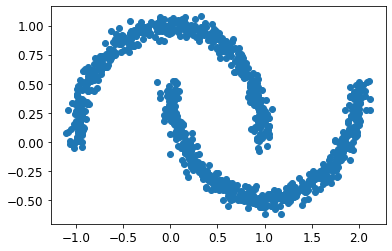

In [225]:
plt.scatter(X[:,0],X[:,1])

In [229]:
db.labels_[db.core_sample_indices_]

array([0, 1, 0, 0, 0, 2, 2, 3, 0, 2, 2, 4, 2, 2, 4, 0, 5, 1, 0, 5, 5, 3,
       2, 2, 4, 5, 0, 6, 1, 0, 2, 3, 3, 4, 4, 4, 0, 2, 0, 2, 4, 0, 3, 3,
       0, 5, 2, 3, 5, 0, 0, 0, 2, 3, 0, 3, 6, 0, 2, 4, 4, 0, 3, 0, 4, 0,
       3, 3, 4, 0, 2, 2, 4, 1, 6, 5, 2, 2, 3, 3, 2, 4, 0, 0, 0, 2, 5, 2,
       0, 2, 3, 1, 5, 2, 4, 2, 2, 4, 4, 0, 0, 6, 2, 2, 0, 3, 3, 3, 3, 5,
       4, 2, 2, 2, 4, 2, 4, 0, 2, 1, 2, 6, 4, 2, 3, 2, 2, 0, 0, 2, 0, 4,
       0, 4, 4, 1, 3, 2, 6, 1, 4, 4, 2, 0, 0, 1, 0, 5, 1, 1, 2, 2, 2, 5,
       5, 1, 4, 0, 3, 3, 0, 0, 0, 2, 0, 5, 2, 2, 3, 5, 2, 2, 0, 4, 0, 4,
       2, 2, 2, 2, 3, 2, 0, 2, 0, 4, 6, 0, 3, 3, 5, 5, 4, 3, 5, 0, 2, 3,
       6, 3, 3, 4, 3, 2, 2, 2, 4, 0, 2, 2, 6, 3, 4, 4, 2, 2, 1, 0, 1, 6,
       3, 2, 4, 0, 5, 0, 3, 2, 0, 2, 5, 4, 5, 2, 6, 5, 2, 2, 2, 6, 1, 6,
       2, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 2, 6, 1, 2, 5, 3, 5, 4, 0, 2, 6,
       2, 3, 2, 2, 0, 4, 0, 6, 1, 5, 3, 0, 2, 3, 2, 4, 2, 3, 4, 5, 4, 4,
       1, 0, 5, 6, 5, 3, 2, 5, 1, 5, 2, 5, 5, 3, 2,

In [230]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

# Gaussian Mixtures

given the dataset X, you typically want
to start by estimating the weights ϕ and all the distribution parameters μ
(1) to μ
(k)
 and
Σ
(1) to Σ
(k)
. Scikit-Learn’s GaussianMixture class makes this trivial

In [8]:
import numpy as np
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [7]:
from sklearn.mixture import GaussianMixture

In [9]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

This class relies on the ExpectationMaximization (EM) algorithm, which has many similarities with the K-Means algo‐
rithm: it also initializes the cluster parameters randomly, then it repeats two steps
until convergence, first assigning instances to clusters (this is called the expectation
step) then updating the clusters (this is called the maximization step). Sounds famil‐
iar? Indeed, in the context of clustering you can think of EM as a generalization of KMeans which not only finds the cluster centers (μ
(1) to μ
(k)
), but also their size, shape
and orientation (Σ
(1) to Σ
(k)
), as well as their relative weights (ϕ
(1) to ϕ
(k)
). Unlike KMeans, EM uses soft cluster assignments rather than hard assignments: for each
instance during the expectation step, the algorithm estimates the probability that it
belongs to each cluster (based on the current cluster parameters). Then, during the
maximization step, each cluster is updated using all the instances in the dataset, with
each instance weighted by the estimated probability that it belongs to that cluster.
These probabilities are called the responsibilities of the clusters for the instances. 

In [10]:
gm.weights_


array([0.39025715, 0.40007391, 0.20966893])

In [11]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [12]:
 gm.covariances_


array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [13]:
gm.converged_

True

In [16]:
gm.n_iter_

4

1. you have an estimate of the location, size, shape, orientation and rela‐
tive weight of each cluster, 
2. the model can easily assign each instance to the most likely
cluster (hard clustering) or estimate the probability that it belongs to a particular
cluster (soft clustering). 
3. For this, just use the predict() method for hard clustering,
or the predict_proba() method for soft clustering:

In [17]:
gm.predict(X)


array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [23]:
np.unique(gm.predict(X))

array([0, 1, 2], dtype=int64)

In [18]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

In [ ]:
It is a generative model, meaning you can actually sample new instances from it (note
that they are ordered by cluster index):

In [20]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [21]:
y_new

array([0, 0, 1, 2, 2, 2])

It is also possible to estimate the density of the model at any given location. This is
achieved using the score_samples() method: for each instance it is given, this
method estimates the log of the probability density function (PDF) at that location.
The greater the score, the higher the density:

In [24]:
gm.score_samples(X)


array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

# Anomaly Detection Using Gaussian Mixtures
Gaussian Mixtures can be used for anomaly detection: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density:

In [25]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

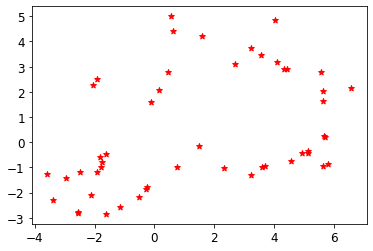

In [26]:
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')